# Exploratory Data Analysis

#### In order to better capture the behavior of the data, data from 4-hour intervals will be used.

In [41]:
import pandas as pd
import numpy as np
import sqlite3 as sql
import matplotlib.pyplot as plt
import plotly_express as px
import seaborn as sns

import mplfinance as mpf # pip install mplfinance


In [42]:
conn = sql.connect('Data/db/btc.db')
cursor = conn.cursor()
df_1d = pd.read_sql_query("SELECT * FROM btc_1d", conn)

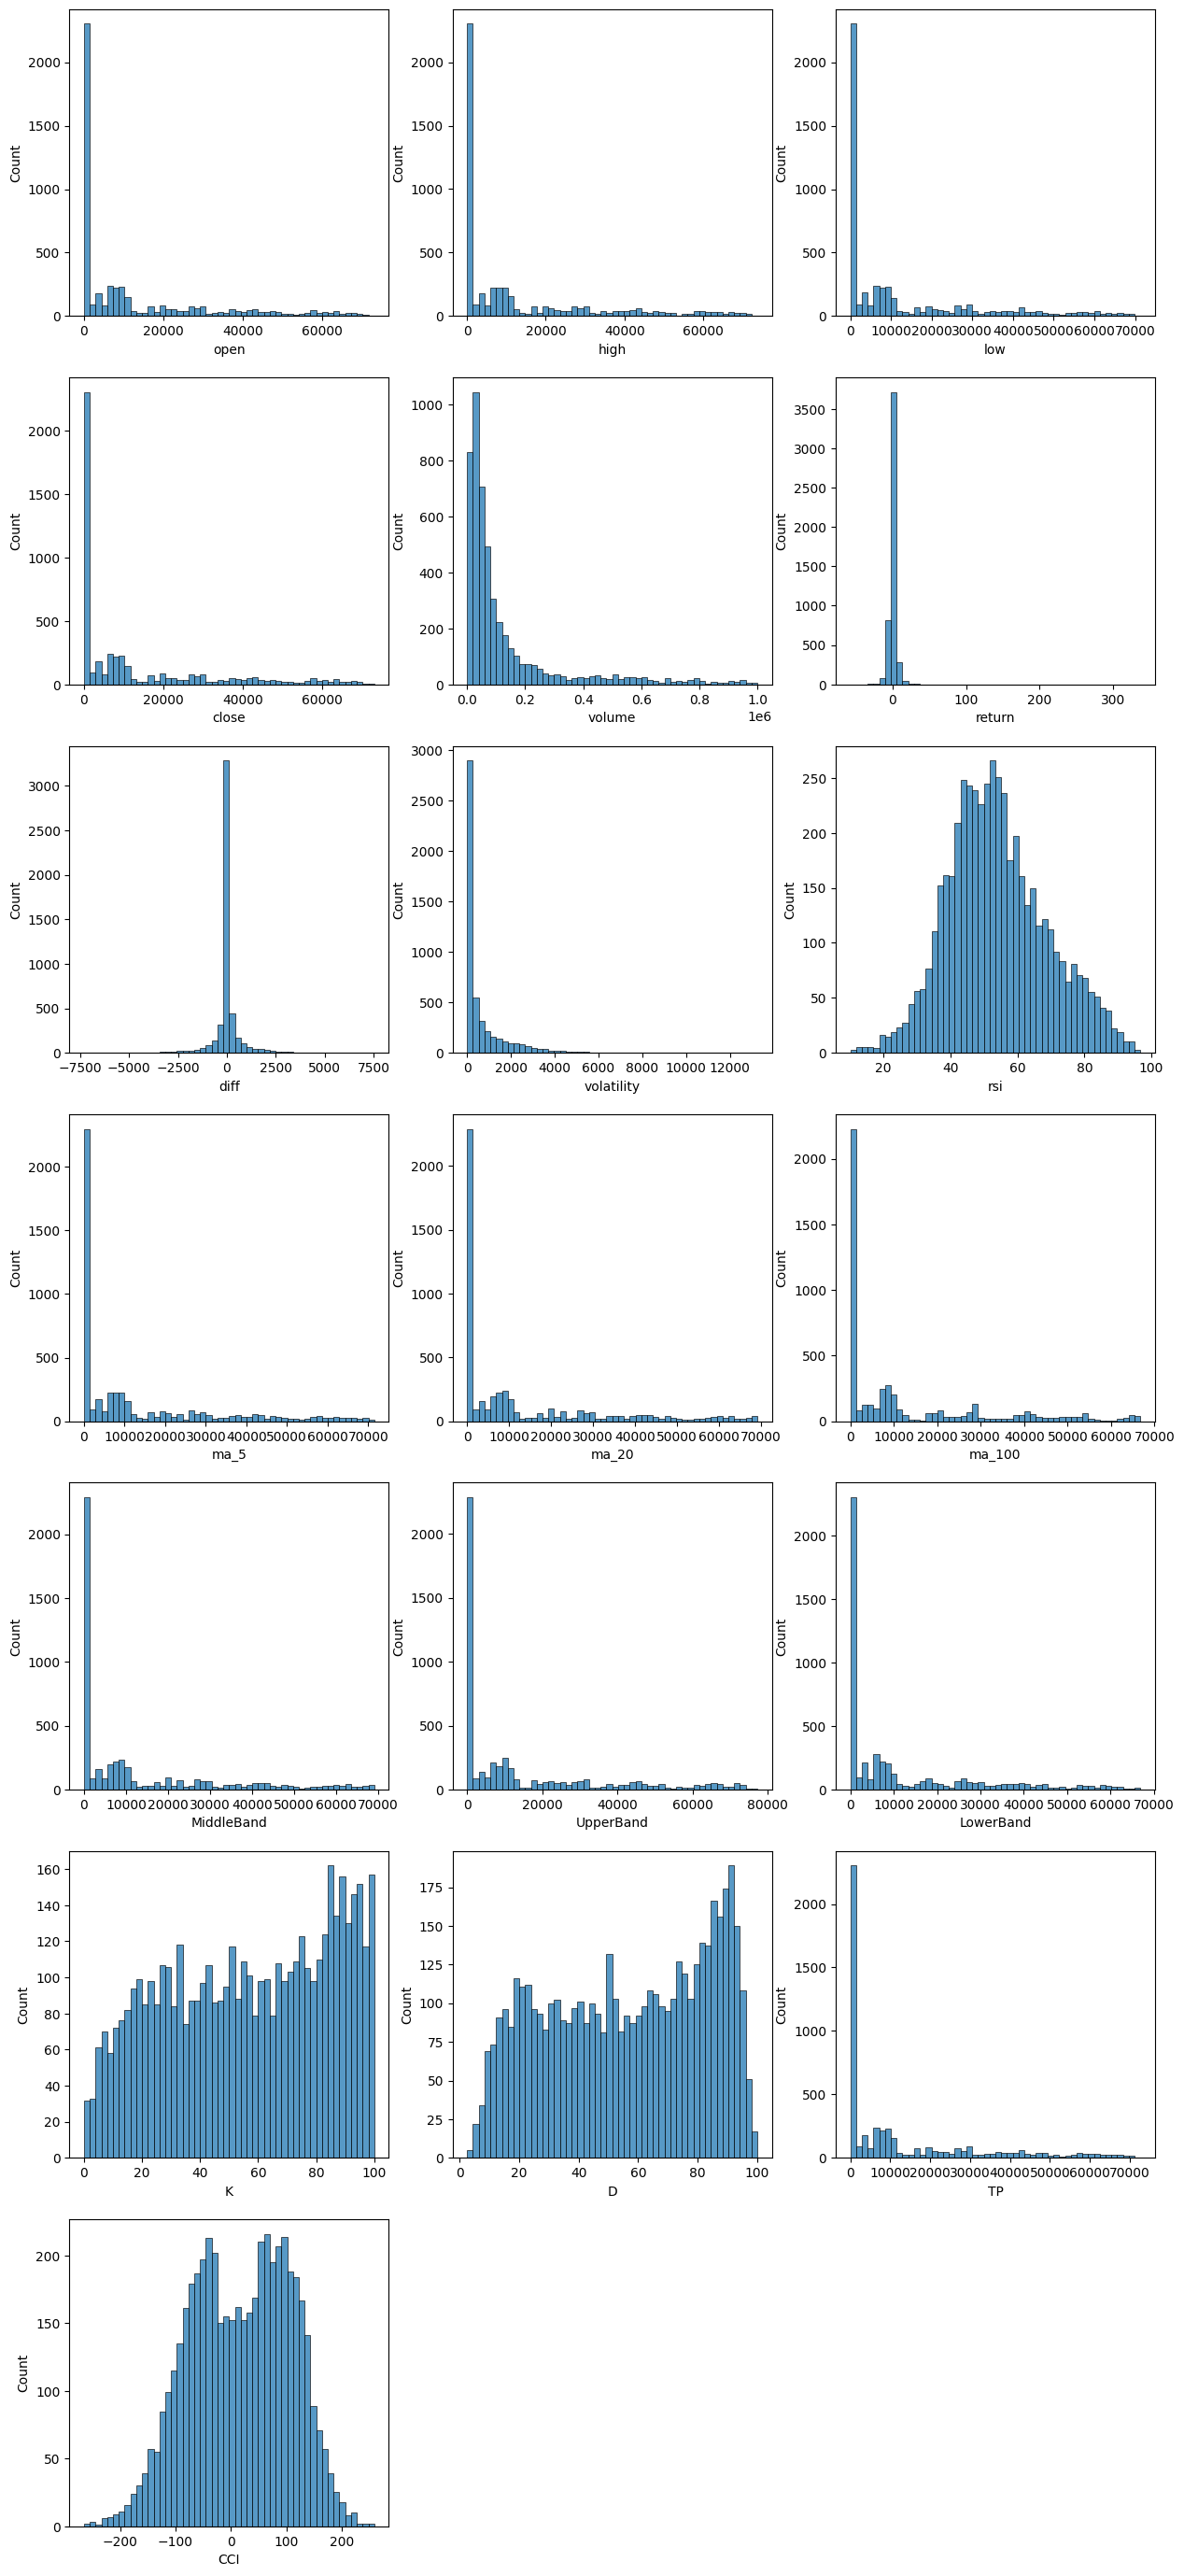

In [43]:
from Scripts.funciones import graficar_histogramas
df_numeric = df_1d.select_dtypes(include=[np.number])
hist = graficar_histogramas(df_numeric,df_numeric.columns)

## 1.1 Correlation of the features

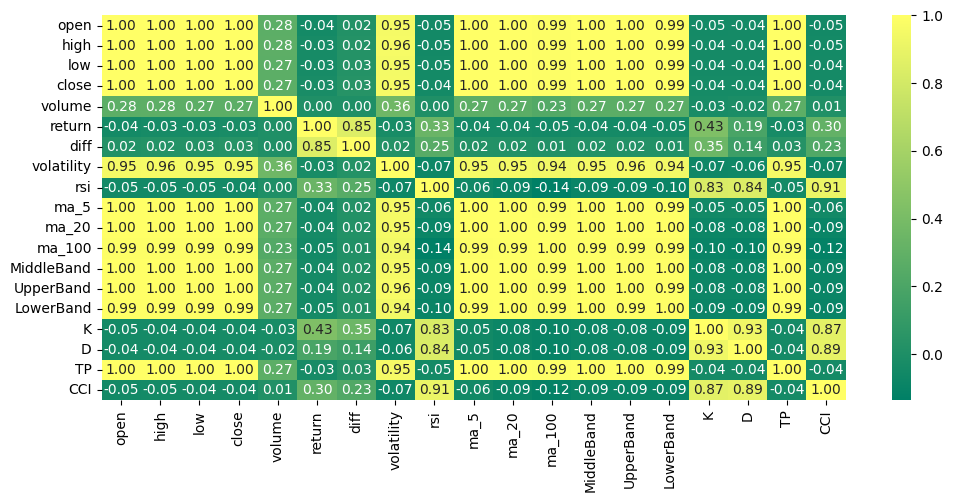

In [44]:
plt.figure(figsize=(12,5))
sns.heatmap(df_numeric.corr(method='spearman'),annot=True,fmt='.2f',cmap='summer')
plt.show()

# Time-Series

In [45]:
df_1d['date']=pd.to_datetime(df_1d['date'])
# Creamos las columnas de año, trimestre, mes y dia.
df_1d['year'] = df_1d['date'].apply(lambda x: x.year)
df_1d['quarter'] = df_1d['date'].apply(lambda x: x.quarter)
df_1d['month'] = df_1d['date'].apply(lambda x: x.month)

In [46]:

def variable_tiempo(df,variable):
    # funcion creada para ver la acumulacion de valores en diferentes marcos temporales de una variable.
    columnas_tiempo = ['year','quarter','month']
    plt.figure(figsize=(18, 14))
    y = 3
    x = 2
    z = 1
    for col in columnas_tiempo:
        plt.subplot(x,y,z,facecolor = 'skyblue')
        z += 1
        df.groupby(col)[variable].sum().plot(kind='bar',color='blue')
        plt.title(f'{variable} vs {col}')
        plt.xlabel(col)
        plt.ylabel("kW")

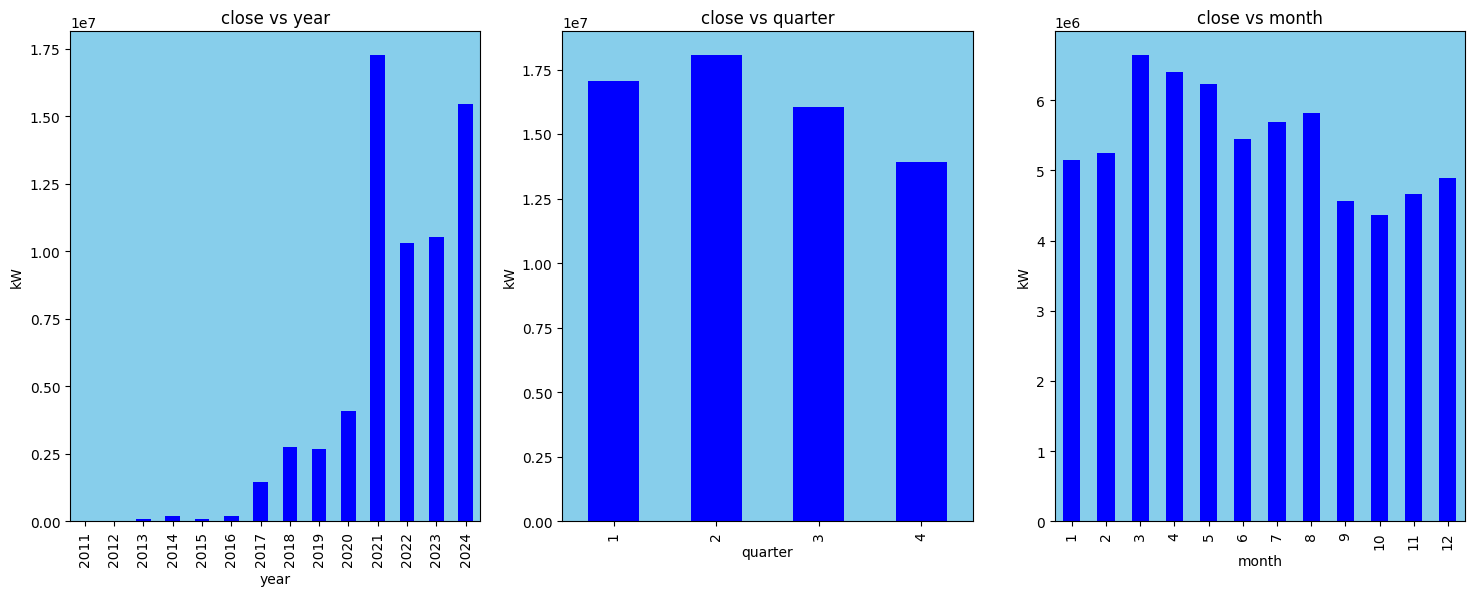

In [47]:
variable_tiempo(df_1d,'close')

In [48]:
df_1d['date_time'] = df_1d['date']
df_1d.index = df_1d['date']

In [49]:
df_1d

,date,time,open,high,low,close,volume,return,diff,volatility,...,UpperBand,LowerBand,K,D,TP,CCI,year,quarter,month,date_time
date,,,,,,,,,,,,,,,,,,,,,
2011-01-12 00:00:26,2011-01-12 00:00:26,1294790400000,0.30,0.40,0.30,0.30,31360.00000,0.000000,0.00,0.10,...,NaN,NaN,NaN,NaN,0.333333,NaN,2011,1,1,2011-01-12 00:00:26
2011-01-13 00:00:03,2011-01-13 00:00:03,1294876800000,0.30,0.40,0.30,0.30,20120.00000,0.000000,0.00,0.10,...,NaN,NaN,NaN,NaN,0.333333,NaN,2011,1,1,2011-01-13 00:00:03
2011-01-13 23:59:39,2011-01-13 23:59:39,1294963200000,0.30,0.40,0.30,0.40,27130.00000,33.333333,0.10,0.10,...,NaN,NaN,NaN,NaN,0.366667,NaN,2011,1,1,2011-01-13 23:59:39
2011-01-14 23:59:15,2011-01-14 23:59:15,1295049600000,0.40,0.40,0.40,0.40,1520.00000,0.000000,0.00,0.00,...,NaN,NaN,NaN,NaN,0.400000,NaN,2011,1,1,2011-01-14 23:59:15
2011-01-16 00:01:03,2011-01-16 00:01:03,1295136000000,0.40,0.40,0.40,0.40,2780.00000,0.000000,0.00,0.00,...,NaN,NaN,NaN,NaN,0.400000,NaN,2011,1,1,2011-01-16 00:01:03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-09 23:59:02,2024-09-09 23:59:02,1725926400000,57042.01,58044.36,56386.40,57805.99,21922.81637,1.339329,763.98,1657.96,...,65047.034370,52697.502630,60.995661,40.857106,57412.250000,-33.221266,2024,3,9,2024-09-09 23:59:02
2024-09-11 00:00:50,2024-09-11 00:00:50,1726012800000,57635.99,57981.71,55545.19,57638.84,31541.34329,0.004945,2.85,2436.52,...,64891.165400,52579.671600,59.055888,54.060827,57055.246667,-37.240419,2024,3,9,2024-09-11 00:00:50
2024-09-12 00:00:26,2024-09-12 00:00:26,1726099200000,57338.00,58588.00,57324.00,57937.99,30309.84123,1.046409,599.99,1264.00,...,64062.307766,52798.604234,72.869069,64.306873,57949.996667,-12.653729,2024,3,9,2024-09-12 00:00:26


In [54]:
# Se localizan los datos correspondientes para cada año
# ==============================================================================
years = list(df_1d.index.year.unique())
df_plot = pd.DataFrame()

for year in years:

    year_open = df_1d.loc[df_1d.index.year == year, "open"].iloc[0]
    year_close = df_1d.loc[df_1d.index.year == year, "close"].iloc[-1]
    year_low = df_1d.loc[df_1d.index.year == year, "low"].min()
    year_high = df_1d.loc[df_1d.index.year == year, "high"].max()

    df_plot[year] = pd.Series([year_open, year_close, year_low, year_high])
df_plot = df_plot.T
df_plot = df_plot.set_axis(["open", "close", "low", "high"], axis=1)

df_plot["year_change"] = 100 * (df_plot["close"] - df_plot["open"]) / df_plot["open"]
df_plot.head(3)

,open,close,low,high,year_change
2011,0.3,5.3,0.3,31.9,1666.666667
2012,5.3,13.3,3.9,15.4,150.943396
2013,13.3,805.9,13.2,1241.9,5959.398496


In [55]:

# Asegúrate de que el dataframe tiene un índice de fecha adecuado
#df_plot.index = pd.to_datetime(df_plot.index)

# Cálculo del porcentaje de cambio para las anotaciones
annotations_list = []
max_high = df_plot["high"].max()

for year in years:
    df_aux = df_plot.loc[df_plot.index == year]
    loc_x = df_aux.index[0]
    loc_y = df_aux["high"].values[0] + (max_high * 0.05)
    text = "{:.1f}%".format(df_aux["year_change"].values[0])
    annotations_list.append((loc_x, loc_y, text))

# Crear gráfico de velas con mplfinance
mpf.plot(
    df_plot,
    type='candle',  # Gráfico de velas
    style='charles',
    title='Chart Bitcoin/USD por año',
    ylabel='Precio (USD)',
    figsize=(10, 6),
    volume=False,  # Si no quieres el gráfico de volumen
)

# Añadir las anotaciones
for loc_x, loc_y, text in annotations_list:
    plt.text(loc_x, loc_y, text, horizontalalignment='center')

# Mostrar el gráfico
plt.show()


TypeError: Expect data.index as DatetimeIndex